In [3]:
import pandas as pd
import numpy as np

In [4]:
import nltk

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

- First step is to tokenize the text into words or sentences so that one may be able to access them.
- There are several options for Tokenizers

In [5]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [6]:
text = """Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.
The sky is pinkish-blue. You shouldn't eat cardboard"""

In [7]:
tokenized_text = sent_tokenize(text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


In [8]:
tokenized_text[0]

'Hello Mr. Smith, how are you doing today?'

In [9]:
tokenized_words = word_tokenize(text)
print(tokenized_words)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


In [17]:
tokenized_words[0]

'Hello'

You may opt to look at the distribution of the words

In [15]:
from nltk.probability import FreqDist

frequency = FreqDist(tokenized_words)
print(frequency)

<FreqDist with 25 samples and 30 outcomes>


In [16]:
import matplotlib.pyplot as plt

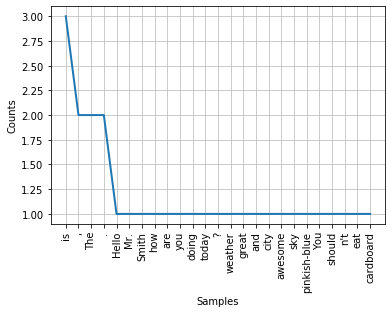

In [17]:
frequency.plot(30)

In [18]:
text

"Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.\nThe sky is pinkish-blue. You shouldn't eat cardboard"

One can also draw a wordcloud that will perform EDA for NLP

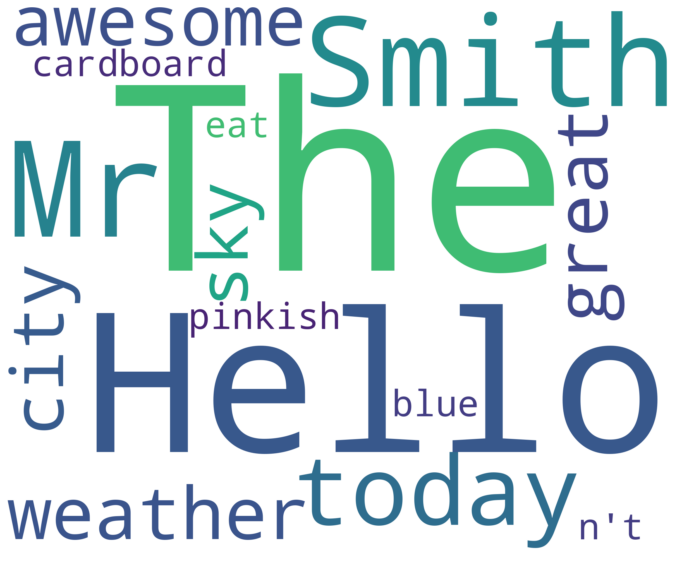

In [19]:
from wordcloud import WordCloud, STOPWORDS

corpus = ' '.join(tokenized_words)
corpus = corpus.replace('.', '. ')
                   
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white',width = 2400,height = 2000).generate(corpus)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Within this we notice we have some common words that add no meaning to the sentence but they need to be there for the sentence to make grammatical sense e.g. a, the, is, am.... These are called stop words and we can remove them from our text

In [20]:
stop_words = set(STOPWORDS)
print(stop_words)

{"he'd", 'about', 'cannot', 'itself', 'him', 'its', 'they', 'had', 'those', 'a', 'how', 'his', "didn't", 'their', 'between', 'would', 'like', 'while', "you've", 'being', 'over', "i'll", 'myself', "you'd", 'ours', "won't", 'then', 'an', "don't", 'on', 'at', 'because', "she'll", 'more', "aren't", 'should', "he's", 'again', 'such', "we're", 'however', 'most', 'same', 'ourselves', 'into', "weren't", "wouldn't", 'himself', "doesn't", 'my', "where's", 'some', 'down', 'whom', 'until', 'through', 'yours', 'which', "they're", 'before', 'who', 'herself', 'she', 'from', 'doing', 'with', 'only', "when's", 'been', "wasn't", "that's", "who's", "here's", "they'd", 'our', 'them', 'do', 'of', 'www', 'no', 'once', "shouldn't", "they'll", 'not', "you're", 'shall', "couldn't", 'since', 'hence', "how's", 'also', 'other', 'were', 'ought', 'her', "it's", "what's", 'are', 'when', 'but', 'themselves', 'therefore', 'very', 'that', 'theirs', 'having', 'is', 'own', 'too', 'under', "haven't", 'off', 'after', 'k', 

In [21]:
from nltk.corpus import stopwords

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [31]:
stops = set(stopwords.words('english'))
print(stops)

{'these', 'too', 'him', 'because', 'shan', "doesn't", 'do', 'the', 'off', 'didn', 'of', 'i', "won't", 'only', 'y', 'don', 'and', 'through', 'as', 'she', 'until', 'how', 'who', "wouldn't", 'yourself', 'we', 'd', 'now', 'above', 'you', 'his', 'just', 'it', 'being', 'needn', "you'll", 'can', 'not', "isn't", 'which', 'an', 'them', 'nor', "couldn't", 'your', "aren't", 'my', 'did', 'while', 'down', 'if', 're', 'here', "didn't", 'own', 'this', 'with', 'hadn', 'itself', 'such', "weren't", 'other', "hasn't", 'couldn', 'whom', 'or', "that'll", 'again', 'at', 'had', 've', 'are', "she's", 'by', 'so', 'themselves', "shouldn't", "you'd", "don't", 'ain', 'myself', 'below', 'hers', 'am', 'himself', 'once', 'doesn', 'all', 'after', 'has', 'why', 'no', 's', "it's", 'from', 'herself', 'weren', 'when', 'both', 'to', "mightn't", 'yourselves', 'they', 'then', 'theirs', 'does', "shan't", 'wouldn', 'what', "haven't", 'those', 'me', 'but', 'our', 'further', "you've", 'their', 'will', 'there', 'should', 'than',

In [22]:
lower_case_output = list(map(lambda x:x.lower(), tokenized_words))
#the words within stopwords are in lower case thus if the word starts with a capital letter it will not be treated as a stopword

filtered_text = []

for word in lower_case_output:
    if word not in stop_words:
        filtered_text.append(word)
        
print("Tokenized Sentence:",tokenized_text)
print()
print("Filterd Sentence:",filtered_text)

Tokenized Sentence: ['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]

Filterd Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?', 'weather', 'great', ',', 'city', 'awesome', '.', 'sky', 'pinkish-blue', '.', "n't", 'eat', 'cardboard']


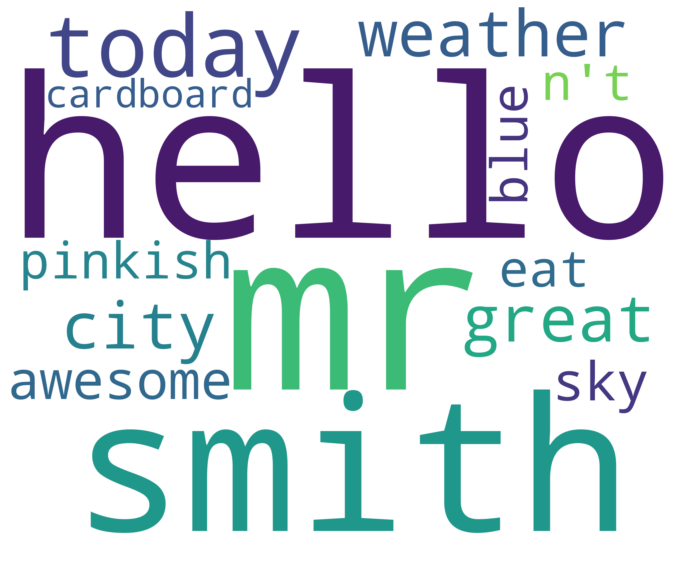

In [23]:
from wordcloud import WordCloud, STOPWORDS

corpus = ' '.join(lower_case_output)
corpus = corpus.replace('.', '. ')
                   
wordcloud = WordCloud(stopwords = stop_words, background_color = 'white',width = 2400,height = 2000).generate(corpus)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

With the tokenization we have done so far, we see that punctuation marks are being treated as words and we may not want these. To remove punctuation one may create a custom function, or use a different tokenizer that can recognize punctauation and know that they are not words. I opted for the tokenizer and it is RegexpTokenizer

In [24]:
from nltk.tokenize import RegexpTokenizer

In [25]:
tokenizer = RegexpTokenizer(r'\w+')

result = tokenizer.tokenize(text)

In [26]:
print(result)

['Hello', 'Mr', 'Smith', 'how', 'are', 'you', 'doing', 'today', 'The', 'weather', 'is', 'great', 'and', 'city', 'is', 'awesome', 'The', 'sky', 'is', 'pinkish', 'blue', 'You', 'shouldn', 't', 'eat', 'cardboard']


- In the event one has a lot of text, some words may be repeated in the sense that different variations of the word are present in the text e.g considering tense one may have fly, flying, flew, flown.

- In this event, one may wish to bundle up such words together so that looking at the data becomes easier. This is called Lexicon Normalization and there are also several ways to do it.

- Here we look at PorterStemmer and WordNetLemmatizer

In [28]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

words = ['fly', 'flying', 'flew']

stemmed_words = []
for word in words:
    stemmed_words.append(ps.stem(word))

print("Filtered Sentence:",words)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['fly', 'flying', 'flew']
Stemmed Sentence: ['fli', 'fli', 'flew']


In [30]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [32]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

print("Lemmatized Word:",lem.lemmatize('flew',"v"))

Lemmatized Word: fly


We can now try and do this on a dataset

In [34]:
train = pd.read_csv('train.tsv', sep = '\t')
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [63]:
listed = train['Phrase'].head(1000).tolist()

listed[:10]

['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
 'A series of escapades demonstrating the adage that what is good for the goose',
 'A series',
 'A',
 'series',
 'of escapades demonstrating the adage that what is good for the goose',
 'of',
 'escapades demonstrating the adage that what is good for the goose',
 'escapades',
 'demonstrating the adage that what is good for the goose']

In [44]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 
        

In [66]:
listed_2 = listToString(listed)

listed_2[:100]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the g'

We had to convert the data in that column to a string because the tokenizer we want to use only accepts string inputs

In [67]:
tokenized_data = tokenizer.tokenize(listed_2)
print(tokenized_data[:10])

['A', 'series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is']


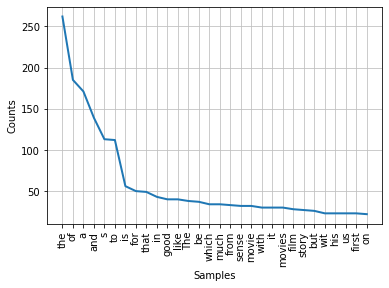

In [50]:
frequency = FreqDist(tokenized_data)

frequency.plot(30)

From a frequency plot we see our frequent words are stop words so we can remove them

In [52]:
lowered_case_output = list(map(lambda x:x.lower(), tokenized_data))

filtered_text = []

for word in lowered_case_output:
    if word not in stop_words:
        filtered_text.append(word)
        
print("Tokenized Sentence:",tokenized_data[:10])
print()
print("Filterd Sentence:",filtered_text[:10])

Tokenized Sentence: ['A', 'series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is']

Filterd Sentence: ['series', 'escapades', 'demonstrating', 'adage', 'good', 'goose', 'good', 'gander', 'occasionally', 'amuses']


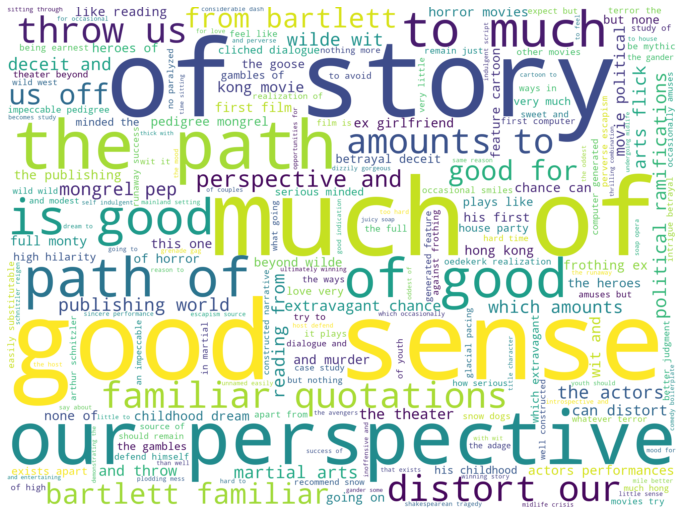

In [53]:
corpus = ' '.join(lowered_case_output)
corpus = corpus.replace('.', '. ')
                   
wordcloud = WordCloud(stopwords = stop_words, background_color = 'white',width = 2000,height = 1500).generate(corpus)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf =  tf.fit_transform(lowered_case_output[:1000])

In [89]:
text_tf

<1000x101 sparse matrix of type '<class 'numpy.float64'>'
	with 908 stored elements in Compressed Sparse Row format>

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_tf, train['Sentiment'].head(1000), test_size = 0.3, random_state = 101)

In [61]:
X_train

<700x101 sparse matrix of type '<class 'numpy.float64'>'
	with 636 stored elements in Compressed Sparse Row format>

In [94]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)

predicted =  clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.66


In [68]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predicted))

[[  0   0   4   0   0]
 [  0   1  39   0   0]
 [  0   4 196   1   0]
 [  0   1  37   1   0]
 [  0   0  16   0   0]]


In [69]:
print(classification_report(y_test, predicted)) #not sooo accurate but NLP algorithms are still being improved.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.17      0.03      0.04        40
           2       0.67      0.98      0.80       201
           3       0.50      0.03      0.05        39
           4       0.00      0.00      0.00        16

    accuracy                           0.66       300
   macro avg       0.27      0.21      0.18       300
weighted avg       0.54      0.66      0.54       300



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Now to apply learned model to test set to get predictions.....

In [70]:
test = pd.read_csv('test.tsv', sep ='\t')
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [78]:
to_list = test['Phrase'].head(1000).tolist()

to_list[:10]

['An intermittently pleasing but mostly routine effort .',
 'An intermittently pleasing but mostly routine effort',
 'An',
 'intermittently pleasing but mostly routine effort',
 'intermittently pleasing but mostly routine',
 'intermittently pleasing but',
 'intermittently pleasing',
 'intermittently',
 'pleasing',
 'but']

In [72]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 
        

In [79]:
list_to_string = listToString(to_list)

list_to_string[:100]

'An intermittently pleasing but mostly routine effort . An intermittently pleasing but mostly routine'

In [80]:
tokenized_test_data = tokenizer.tokenize(listed_3)
print(tokenized_test_data[:10])

['An', 'intermittently', 'pleasing', 'but', 'mostly', 'routine', 'effort', 'An', 'intermittently', 'pleasing']


In [82]:
lower_case = list(map(lambda x:x.lower(), tokenized_test_data))

filtered_text = []

for word in lower_case:
    if word not in stop_words:
        filtered_text.append(word)
        
print("Tokenized Sentence:",tokenized_test_data[:10])
print()
print("Filterd Sentence:",filtered_text[:10])

Tokenized Sentence: ['An', 'intermittently', 'pleasing', 'but', 'mostly', 'routine', 'effort', 'An', 'intermittently', 'pleasing']

Filterd Sentence: ['intermittently', 'pleasing', 'mostly', 'routine', 'effort', 'intermittently', 'pleasing', 'mostly', 'routine', 'effort']


#### Here, we apply the same changes to the test data that we made on the training data.

In [90]:
text_tf =  tf.transform(filtered_text[:1000])

In [91]:
text_tf

<1000x101 sparse matrix of type '<class 'numpy.float64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [93]:
predictions = clf.predict(text_tf)
predictions[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

### We now have predictions (may not be too accurate however) on some test data.